# IPL 2025 Exploratory Data Analysis (EDA)

# 1. Load libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
orange_cap = pd.read_csv('orange_cap.csv')
purple_cap = pd.read_csv('purple_cap.csv')

## 2. Dataset Overview

Overview of files and sample records.


In [4]:
for name, df in [('matches', matches), ('deliveries', deliveries),
                 ('orange_cap', orange_cap), ('purple_cap', purple_cap)]:
    print(f"{name}.csv")
    display(df.head())
    print(df.info(), '\n')


matches.csv


,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             74 non-null     int64  
 1   date                 74 non-null     object 
 2   venue                74 non-null     object 
 3   team1                74 non-null     object 
 4   team2                74 non-null     object 
 5   stage                74 non-null     object 
 6   toss_winner          73 non-null     object 
 7   toss_decision        74 non-null     object 
 8   first_ings_score     73 non-null     float64
 9   first_ings_wkts      73 non-null     float64
 10  second_ings_score    72 non-null     float64
 11  second_ings_wkts     72 non-null     float64
 12  match_result         74 non-null     object 
 13  match_winner         71 non-null     object 
 14  wb_runs              34 non-null     object 
 15  wb_wickets           38 non-null     objec

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17183 entries, 0 to 17182
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_no          17183 non-null  int64  
 1   date              17183 non-null  object 
 2   stage             17183 non-null  object 
 3   venue             17183 non-null  object 
 4   batting_team      17183 non-null  object 
 5   bowling_team      17183 non-null  object 
 6   innings           17183 non-null  int64  
 7   over              17183 non-null  float64
 8   striker           17183 non-null  object 
 9   bowler            17183 non-null  object 
 10  runs_of_bat       17183 non-null  int64  
 11  extras            17183 non-null  int64  
 12  wide              17183 non-null  int64  
 13  legbyes           17183 non-null  int64  
 14  byes              17183 non-null  int64  
 15  noballs           17183 non-null  int64  
 16  wicket_type       872 non-null    object

,Position,Batsman,Team,Matches,Innings,Not_out,Runs,Highest_score,Average,Balls_faced,Strike_rate,Hundreds,Fifties,Ducks,Fours,Sixes
0,1,Sai Sudharsan,GT,15,15,1,759,108,54.21,486,156.17,1,6,0,88,21
1,2,Suryakumar Yadav,MI,16,16,5,717,73,65.18,427,167.91,0,5,0,69,38
2,3,Virat Kohli,RCB,15,15,3,657,73,54.75,454,144.71,0,8,0,66,19
3,4,Shubman Gill,GT,15,15,2,650,93,50.00,417,155.87,0,6,0,62,24
4,5,Mitchell Marsh,LSG,13,13,0,627,117,48.23,383,163.70,1,6,2,56,37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Position       15 non-null     int64  
 1   Batsman        15 non-null     object 
 2   Team           15 non-null     object 
 3   Matches        15 non-null     int64  
 4   Innings        15 non-null     int64  
 5   Not_out        15 non-null     int64  
 6   Runs           15 non-null     int64  
 7   Highest_score  15 non-null     int64  
 8   Average        15 non-null     float64
 9   Balls_faced    15 non-null     int64  
 10  Strike_rate    15 non-null     float64
 11  Hundreds       15 non-null     int64  
 12  Fifties        15 non-null     int64  
 13  Ducks          15 non-null     int64  
 14  Fours          15 non-null     int64  
 15  Sixes          15 non-null     int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 2.0+ KB
None 

purple_cap.csv


,Position,Bowler,Team,Matches,Innings,Balls,Overs,Maidens,Runs,Wickets,Best_bowling_figure,Economy_rate,Four_wicket_haul,Five_wicket_hall
0,1,Prasidh Krishna,GT,15,15,354,59.0,0,488,25,4--41,8.27,1,0
1,2,Noor Ahmad,CSK,14,14,300,50.0,0,408,24,4--18,8.16,2,0
2,3,Josh Hazlewood,RCB,12,12,264,44.0,0,386,22,4--33,8.77,1,0
3,4,Trent Boult,MI,16,16,346,57.4,0,517,22,4--26,8.96,1,0
4,5,Arshdeep Singh,PBKS,17,16,350,58.2,1,518,21,3--16,8.88,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Position             15 non-null     int64  
 1   Bowler               15 non-null     object 
 2   Team                 15 non-null     object 
 3   Matches              15 non-null     int64  
 4   Innings              15 non-null     int64  
 5   Balls                15 non-null     int64  
 6   Overs                15 non-null     float64
 7   Maidens              15 non-null     int64  
 8   Runs                 15 non-null     int64  
 9   Wickets              15 non-null     int64  
 10  Best_bowling_figure  15 non-null     object 
 11  Economy_rate         15 non-null     float64
 12  Four_wicket_haul     15 non-null     int64  
 13  Five_wicket_hall     15 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.8+ KB
None 



## 3. Missing Values & Data Types

Check for nulls and clean data types.


In [5]:
print("Missing values per column in matches:")
print(matches.isnull().sum(), '\n')
print("Missing values per column in deliveries:")
print(deliveries.isnull().sum(), '\n')
print("Missing values per column in deliveries:")
print(orange_cap.isnull().sum(), '\n')
print("Missing values per column in deliveries:")
print(purple_cap.isnull().sum(), '\n')

Missing values per column in matches:
match_id                0
date                    0
venue                   0
team1                   0
team2                   0
stage                   0
toss_winner             1
toss_decision           0
first_ings_score        1
first_ings_wkts         1
second_ings_score       2
second_ings_wkts        2
match_result            0
match_winner            3
wb_runs                40
wb_wickets             36
balls_left              2
player_of_the_match     3
top_scorer              3
highscore               3
best_bowling            3
best_bowling_figure     3
dtype: int64 

Missing values per column in deliveries:
match_no                0
date                    0
stage                   0
venue                   0
batting_team            0
bowling_team            0
innings                 0
over                    0
striker                 0
bowler                  0
runs_of_bat             0
extras                  0
wide                  

## 4. Match-Level Insights

- Total matches played  
- Matches by venue  
- Distribution of stages (Group / Playoffs / Finals)


Total matches: 74


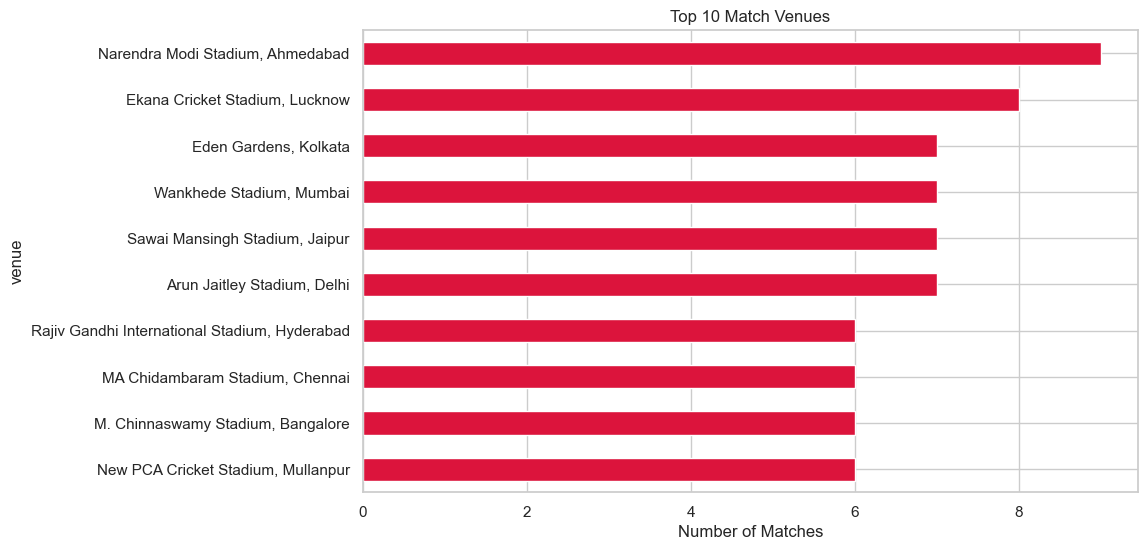

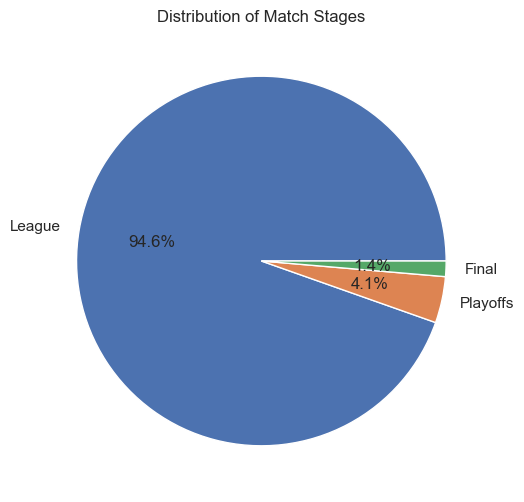

In [6]:
print("Total matches:", matches.shape[0])

# Matches by venue – top 10
matches['venue'].value_counts().head(10).plot(kind='barh' , color = 'crimson')
plt.title('Top 10 Match Venues')
plt.xlabel('Number of Matches')
plt.gca().invert_yaxis()
plt.show()

# Stage distribution pie chart
if 'stage' in matches.columns:
    matches['stage'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribution of Match Stages')
    plt.ylabel('')
    plt.show()


## 5. Toss Decision Impact

- Count of toss decisions (bat/field)  
- Does winning the toss influence match outcome?


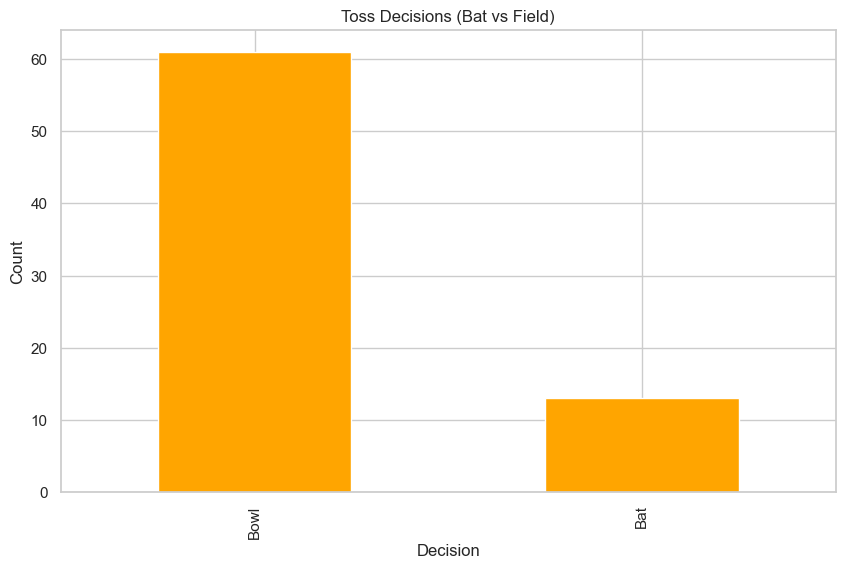

Toss winner won match 56.76% of the time


In [7]:
# Toss decision frequency
matches['toss_decision'].value_counts().plot(kind='bar', color='orange')
plt.title('Toss Decisions (Bat vs Field)')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

# Toss win correlation
matches['toss_match_win'] = matches['toss_winner'] == matches['match_winner']
rate = matches['toss_match_win'].mean() * 100
print(f"Toss winner won match {rate:.2f}% of the time")


## 6. Team Performance

- Matches played and wins per team  
- Head-to-head matrix  
- Highest totals


In [8]:
# Matches and wins
teams = sorted(set(matches['team1']).union(matches['team2']))
summary = pd.DataFrame(teams, columns=['team'])
summary['matches'] = summary['team'].apply(lambda t: ((matches['team1']==t)|(matches['team2']==t)).sum())
summary['wins'] = summary['team'].apply(lambda t: (matches['match_winner']==t).sum())
summary['win_pct'] = summary['wins'] / summary['matches'] * 100
summary.sort_values('wins', ascending=False, inplace=True)
summary


,team,matches,wins,win_pct
6,PBKS,17,11,64.705882
7,RCB,16,10,62.500000
2,GT,15,9,60.000000
1,DC,14,8,57.142857
5,MI,16,8,50.000000
4,LSG,14,6,42.857143
9,SRH,14,6,42.857143
3,KKR,14,5,35.714286
0,CSK,14,4,28.571429
8,RR,14,4,28.571429


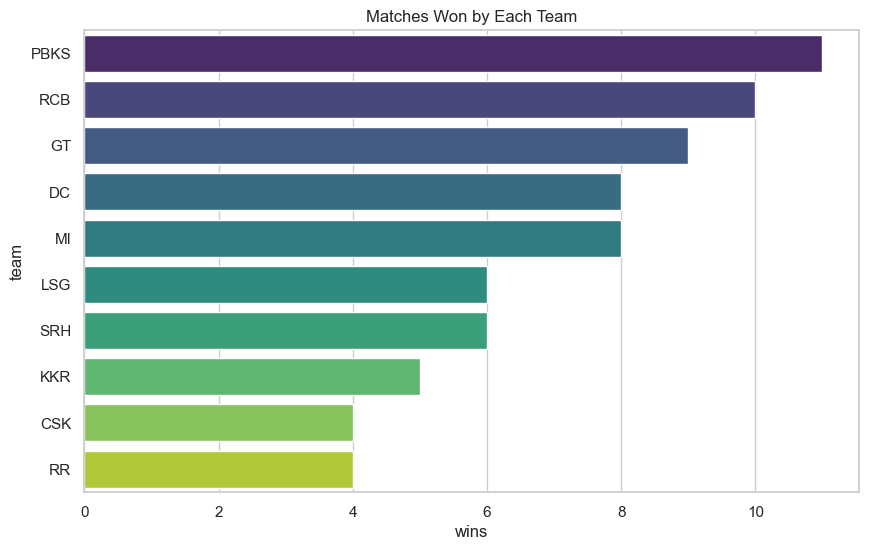

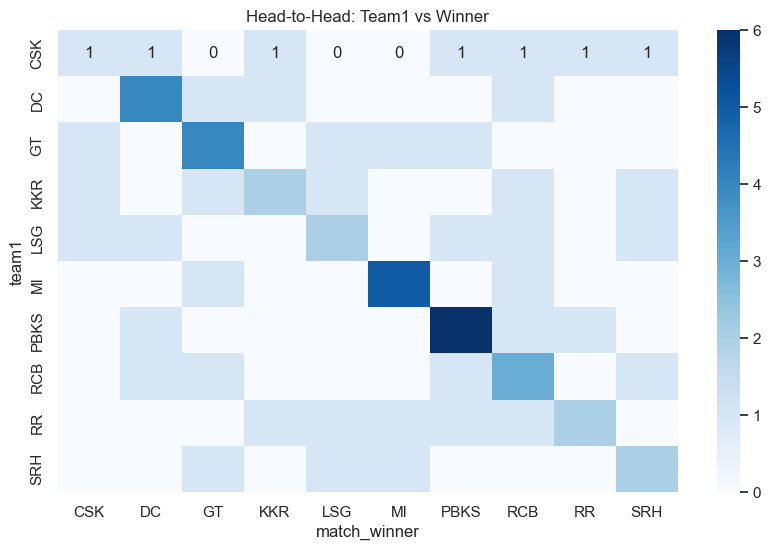

In [9]:
# Bar chart for wins
sns.barplot(x='wins', y='team', data=summary, palette='viridis')
plt.title('Matches Won by Each Team')
plt.show()

# Head-to-head matrix
head2head = pd.crosstab(matches['team1'], matches['match_winner'])
sns.heatmap(head2head, annot=True, fmt='d', cmap='Blues')
plt.title('Head-to-Head: Team1 vs Winner')
plt.show()


In [10]:
#  Compute total_runs manually from component columns
if 'total_runs' not in deliveries.columns:
    deliveries['total_runs'] = (
        deliveries['runs_of_bat'] +
        deliveries.get('wide_runs', 0) +
        deliveries.get('bye_runs', 0) +
        deliveries.get('legbye_runs', 0) +
        deliveries.get('noball_runs', 0) +
        deliveries.get('penalty_runs', 0)
    )

#  Highest team totals across all innings
innings_totals = deliveries.groupby(['match_no', 'innings', 'batting_team'])['total_runs'].sum().reset_index()
top_totals = innings_totals.sort_values('total_runs', ascending=False).head(5)
print("🏏 Top 5 Highest Team Totals (Innings-wise):")
display(top_totals)


🏏 Top 5 Highest Team Totals (Innings-wise):


,match_no,innings,batting_team,total_runs
2,2,1,SRH,268
133,68,1,SRH,254
53,27,2,SRH,237
52,27,1,PBKS,231
108,54,1,PBKS,231


## 7. Batting Analysis

- Top run scorers  
- Strike rate vs average  
- Fours & sixes comparison


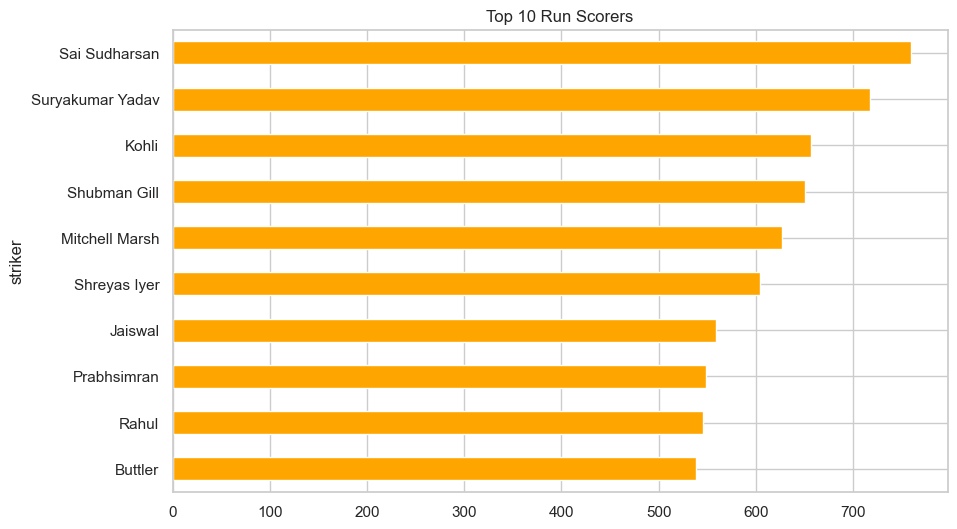

In [11]:
# Total runs per batter
bat_runs = deliveries.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False)
top10_bat = bat_runs.head(10)
top10_bat.plot(kind='barh', color='orange')
plt.title('Top 10 Run Scorers')
plt.gca().invert_yaxis()
plt.show()


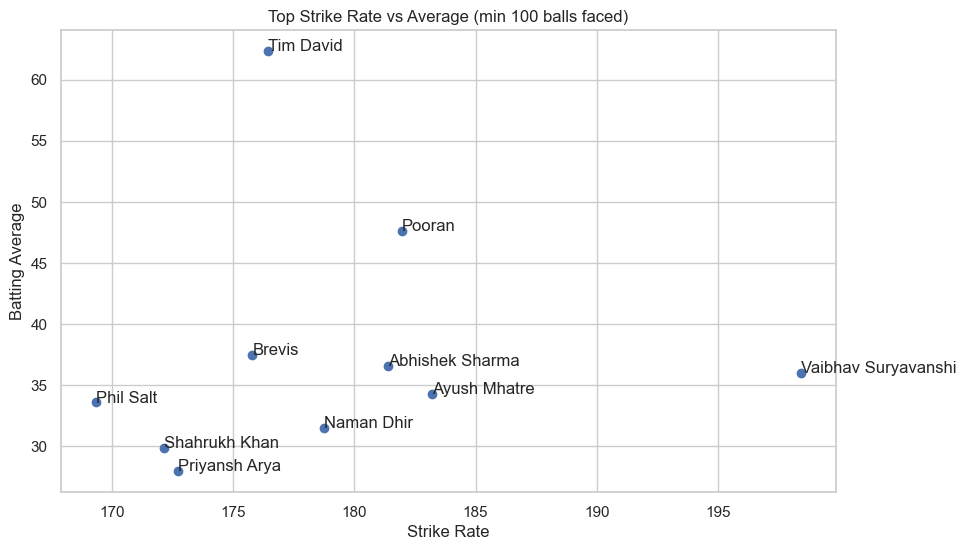

In [12]:
# Strike rate vs average
bat_stats = deliveries.groupby('striker').agg(
    runs=('runs_of_bat','sum'),
    balls=('runs_of_bat', lambda x: x.count()),
    dismissals=('player_dismissed', lambda x: x.notnull().sum())
).reset_index()
bat_stats['strike_rate'] = bat_stats['runs']/bat_stats['balls']*100
bat_stats['avg'] = bat_stats['runs']/bat_stats['dismissals']
top_sr = bat_stats[(bat_stats['balls']>=100)].nlargest(10, 'strike_rate')
plt.scatter(top_sr['strike_rate'], top_sr['avg'])
for i,row in top_sr.iterrows():
    plt.text(row['strike_rate'], row['avg'], row['striker'])
plt.xlabel('Strike Rate')
plt.ylabel('Batting Average')
plt.title('Top Strike Rate vs Average (min 100 balls faced)')
plt.show()


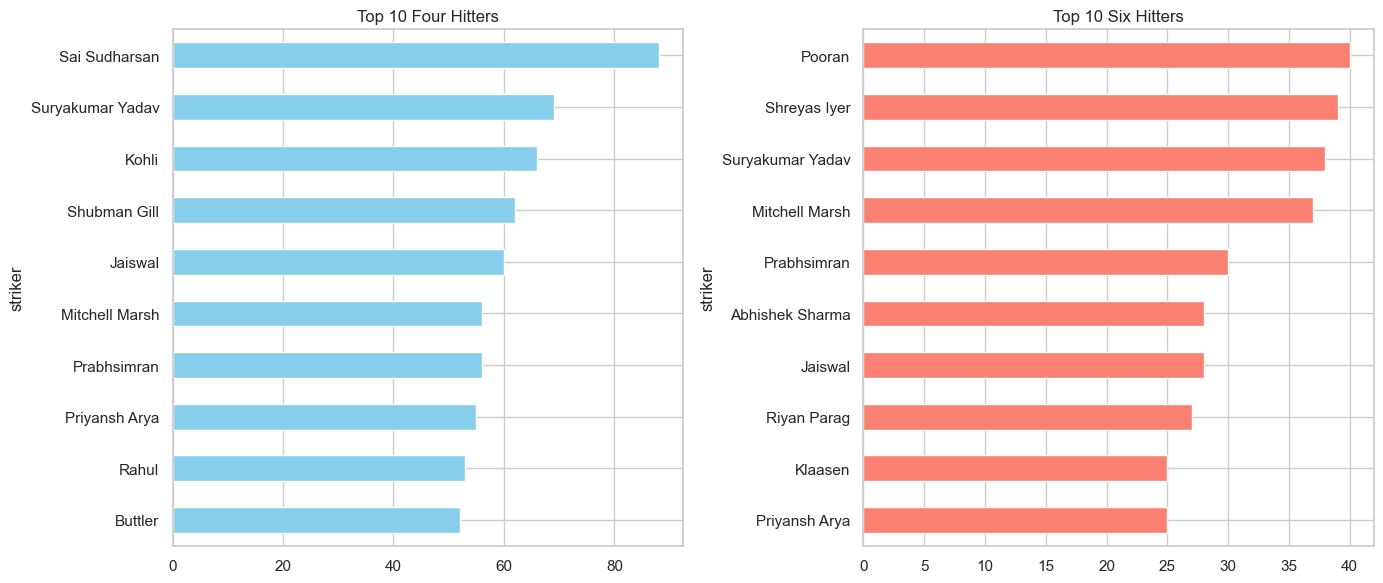

In [13]:
# Fours and Sixes
fours = deliveries[deliveries['runs_of_bat']==4]['striker'].value_counts().head(10)
sixes = deliveries[deliveries['runs_of_bat']==6]['striker'].value_counts().head(10)

fig, ax = plt.subplots(1,2, figsize=(14,6))
fours.plot(kind='barh', ax=ax[0], color='skyblue', title='Top 10 Four Hitters')
ax[0].invert_yaxis()
sixes.plot(kind='barh', ax=ax[1], color='salmon', title='Top 10 Six Hitters')
ax[1].invert_yaxis()
plt.tight_layout()
plt.show()


## 8. Bowling Analysis

- Top wicket-takers  
- Economy distribution  
- Dot balls per bowler


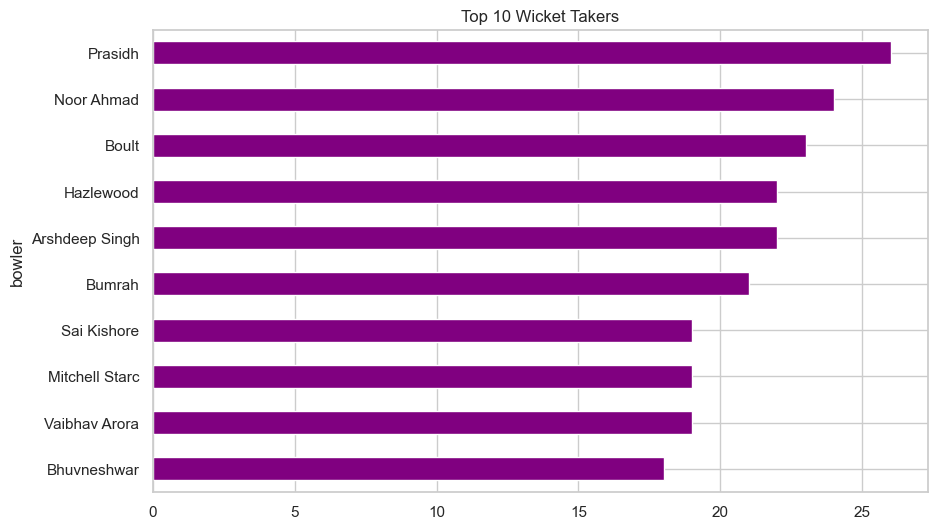

In [14]:
# Wickets per bowler
wickets = deliveries[deliveries['player_dismissed'].notnull()]
top_bowl = wickets['bowler'].value_counts().head(10)
top_bowl.plot(kind='barh', color='purple')
plt.title('Top 10 Wicket Takers')
plt.gca().invert_yaxis()
plt.show()


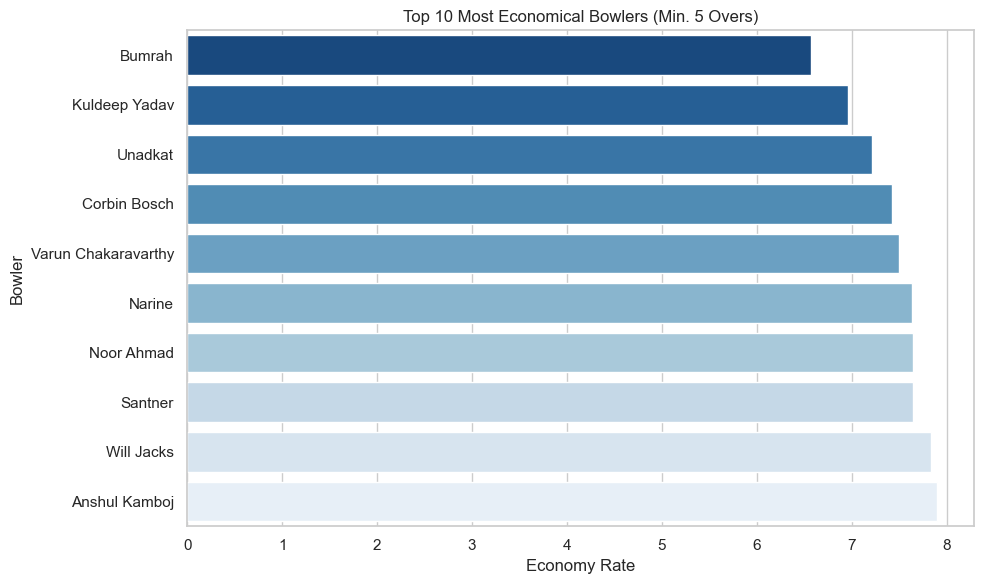

In [15]:
# Recalculate bowling stats safely
bow_stats = deliveries.groupby('bowler').agg(
    runs_conceded=('total_runs','sum'),
    legal_balls=('wide', lambda x: (x==0).sum()),
    wickets=('player_dismissed', lambda x: x.notnull().sum()),
    dot_balls=('total_runs', lambda x: (x==0).sum())
).reset_index()

bow_stats['overs'] = bow_stats['legal_balls'] / 6
bow_stats = bow_stats[bow_stats['overs'] >= 5]  # Filter: bowlers with at least 5 overs
bow_stats['economy'] = bow_stats['runs_conceded'] / bow_stats['overs']

# Sort by economy and pick top 10
top_economical = bow_stats.sort_values('economy').head(10)

# 📊 Bar chart instead of boxplot
plt.figure(figsize=(10,6))
sns.barplot(x='economy', y='bowler', data=top_economical, palette='Blues_r')
plt.title('Top 10 Most Economical Bowlers (Min. 5 Overs)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()


## 9. Over-by-Over Scoring Patterns

- Run rates in powerplay (1–6) and death overs (16–20)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


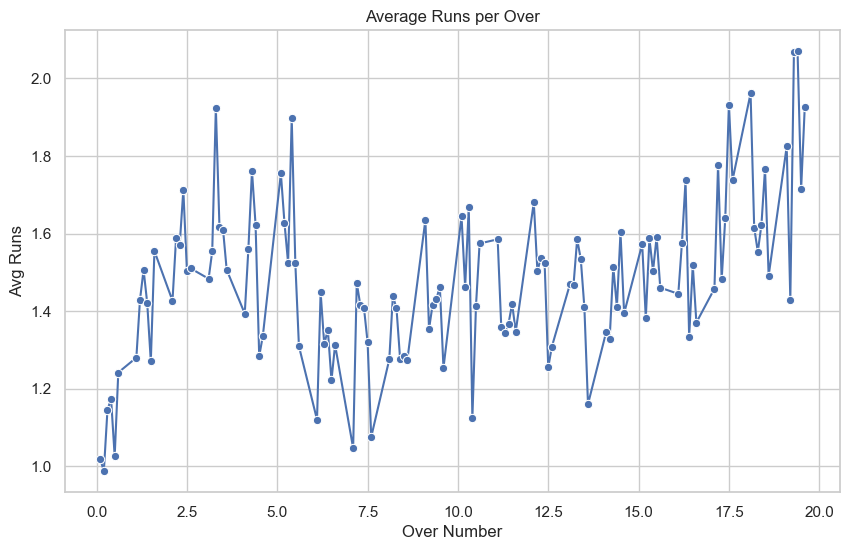

In [28]:
deliveries['over'] = deliveries['over']
over_stats = deliveries.groupby('over')['runs_of_bat'].mean().reset_index()

sns.lineplot(x='over', y='runs_of_bat', data=over_stats, marker='o')
plt.title('Average Runs per Over')
plt.xlabel('Over Number')
plt.ylabel('Avg Runs')
plt.show()


# CONGRATS RCB ON WINNING THE 18TH EDITION OF THE IPL 